# Perceptron

In [1]:
import random
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Load data

In [2]:
iris = pd.read_csv('data/Iris.txt', header=None)
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# replace species with a shorter version
iris.replace("Iris-setosa", "setosa", inplace=True)
iris.replace("Iris-versicolor", "versicolor", inplace=True)
iris.replace("Iris-virginica", "virginica", inplace=True)

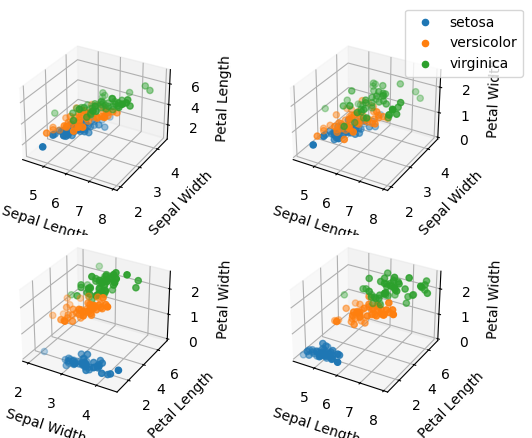

In [3]:
setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species == "versicolor"]
virginica = iris[iris.species == "virginica"]

fig = plt.figure()
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

for df in [setosa, versicolor, virginica]:
    lbl = np.unique(df.species.values)[0]
    ax1.scatter(df.sepal_length, df.sepal_width, df.petal_length, label=lbl)
    ax2.scatter(df.sepal_length, df.sepal_width, df.petal_width, label=lbl)
    ax3.scatter(df.sepal_width, df.petal_length, df.petal_width, label=lbl)
    ax4.scatter(df.sepal_length, df.petal_length, df.petal_width, label=lbl)
    
ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Sepal Width")
ax1.set_zlabel("Petal Length")

ax2.legend(bbox_to_anchor=(0.7, 0.7))
ax2.set_xlabel("Sepal Length")
ax2.set_ylabel("Sepal Width")
ax2.set_zlabel("Petal Width")
    
ax3.set_xlabel("Sepal Width")
ax3.set_ylabel("Petal Length")
ax3.set_zlabel("Petal Width")

ax4.set_xlabel("Sepal Length")
ax4.set_ylabel("Petal Length")
ax4.set_zlabel("Petal Width")
plt.show()

Setosa is clearly linearly separable from versicolor and virginica, so we could employ a simple perceptron to find the decision boundary for this classification task.

## Perceptron implementation

In [ ]:
# let setosa be 1, and virginica and versicolor be -1
def fixedPerceptron(X, y, Weights, learning_rate, cls, epochs=10):
    """Simple perceptron with fixed increment learning.

    Parameters
    ----------
    X : numpy.ndarray
        Data to be used for training.
    y : numpy.ndarray
        Labels for data in X.
    Weights : numpy.ndarray
        Initial weights for each feature in X.
    learning_rate : float
        Learning rate of the perceptron. 0 < learning_rate < 1.
    cls : str
        Linearly separable label.
    epochs : int, optional
        Number of training epochs, by default 10.

    Returns
    -------
    tuple
        Error per epoch and final weight matrix.
    """
    total_samples = np.size(X, 0)

    # create empty Xay to store errors
    epoch_errors = np.empty(epochs)

    for epoch in range(epochs):
        E = 0
        for i in range(total_samples):
            # current classification
            z = np.sign(np.dot(Weights.T, X[i,:]))

            # target classification
            if y[i] == cls:
                T = 1
            else:
                T = -1

            # calculate trial error
            e = T - z

            # update weights
            Weights = Weights + learning_rate * np.sign(e) * X[i,:]

            # update error
            E += int(e != 0)
    
        epoch_errors[epoch] = E
        
    return epoch_errors, Weights

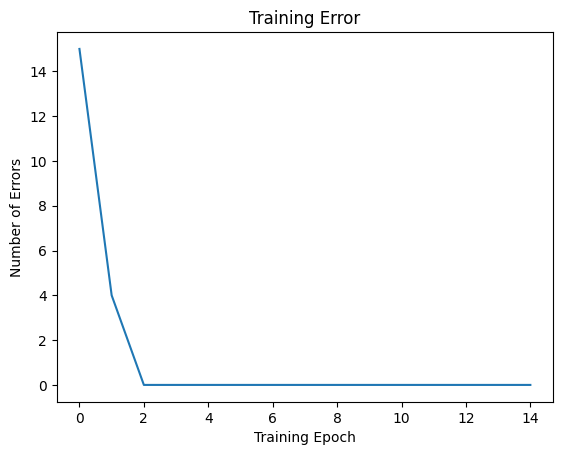

In [29]:
data = iris.to_numpy()
data = np.insert(data, 4, np.ones(np.size(data, 0)), axis=1)

initial_weights = np.random.rand(np.size(data, 1) - 1)
np.random.shuffle(data)

X = data[:, 0:5]
y = data[:, 5]

error, weights = fixedPerceptron(X, y, initial_weights, 0.01, "setosa", epochs=15)
    
plt.figure()
plt.plot(error)
plt.xlabel("Training Epoch")
plt.ylabel("Number of Errors")
plt.title("Training Error")
plt.show()

Now that we've trained the perceptron, it's time to test whether it can accurately classify the species.

In [27]:
# reshuffle the data
np.random.shuffle(data)

X = data[:, 0:5]
y = data[:, 5]

# initialize empty array
y_pred = np.empty(np.size(data, 0))
for i in range(np.size(data, 0)):
    y_pred[i] = int(np.sign(np.dot(weights.T, X[i,:])))

# append prediction array to data
# classified_data = np.append(X, y_pred[:,None],1)

classA = y_pred[y_pred == 1]
classB = y_pred[y_pred == -1]

### Plot decision boundary
This time, we'll plot in 2D for easier visual assessment.

IndexError: index 6 is out of bounds for axis 1 with size 6

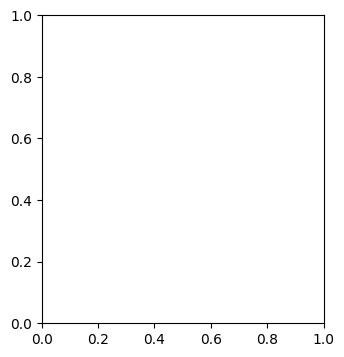

In [ ]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

# plot the first two features
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), 
                     np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]
zz = np.dot(grid, weights[:2])
zz = zz.reshape(xx.shape)
# zz = (-weights[0]*xx - weights[1]*yy - weights[4])*1.0 / weights[2]

for ii in [classA, classB]:
    lbl = np.unique(ii)
    if lbl == 1:
        lbl = "setosa"
    elif lbl == -1:
        lbl = "versicolor/virginica"
    ax1.scatter(x=ii[:, 0], y=ii[:, 1], label=lbl)
        
# ax1.contourf(xx, yy, zz, alpha=0.2)
ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Sepal Width")
# ax1.set_zlabel("Petal Length")

xx,yy = np.meshgrid(range(1,9),range(1,9))
# zz = (-weights[1]*xx - weights[2]*yy - weights[4])*1.0 / weights[3]

ax2 = fig.add_subplot(122)
for ii in [classA, classB]:
    lbl = np.unique(ii[:,6])
    if lbl == 1:
        lbl = "Iris setosa"
    elif lbl == -1:
        lbl = "Iris versicolor/virginica"
    ax2.scatter(x=np.asarray(ii[:,1],dtype="float"),y=np.asarray(ii[:,2],dtype="float"),label=lbl)
        
# ax2.contourf(xx,yy,zz,alpha=0.2)
plt.legend(bbox_to_anchor=(0.4, 1))
ax2.set_xlabel("Sepal Length")
ax2.set_ylabel("Sepal Width")
# ax2.set_zlabel("Petal Length")
plt.show()

We get pretty good classification with the basic Perceptron.

## 1.3 Learning Rate & Convergence
To investigate how the learning rate impacts convergence speed, we will keep our previous starting weights.

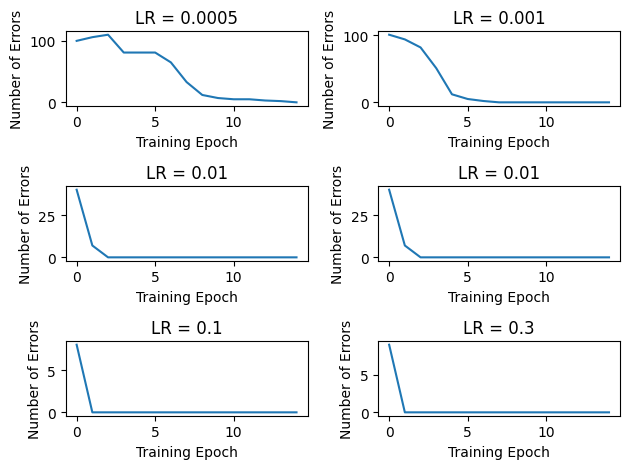

In [12]:
LR = [0.0005, 0.001, 0.01, 0.01, 0.1, 0.3]

np.random.shuffle(data)
test = data

plt.figure()
for i in range(len(LR)):
    ax = plt.subplot(3,2,i+1)
    error, weights = fixedPerceptron(data, initial_weights, LR[i], "setosa", epochs=15)

    ax.plot(error)
    plt.xlabel("Training Epoch")
    plt.ylabel("Number of Errors")
    plt.title("LR = "+str(LR[i]))
plt.tight_layout()

Smaller learning rates lead to slower convergence across epochs, as expected. In other words, smaller tweaks to the model when it makes a mistake result in slower learning.

## 1.4 Absolute correction procedure

In [13]:
# let Class A be 1, Class B & C be -1
def variablePerceptron(X, Weights, learning_rate, cls, epochs=50):
    """Perceptron with absolute error correction.
    
    Parameters
    ----------
    X : numpy.ndarray
        _description_
    Weights : numpy.ndarray
        _description_
    learning_rate : float
        Learning rate of the perceptron. 0 < learning_rate < 1.
    cls : _type_
        _description_
    epochs : int, optional
        _description_, by default 10

    Returns
    -------
    _type_
        _description_
    """
    
    total_samples = np.size(X, 0)

    # create empty array to store errors
    epoch_errors = np.empty(epochs)
    
    # create empty array to store errors
    # Error = np.empty(epochs)

    for epoch in range(epochs):
        E = 0
        for i in range(total_samples):
            # current classification
            z = np.sign(np.dot(Weights.T, X[i, 0:5]))

            # target classification
            if X[i, 5] == cls:
                T = 1
            else:
                T = -1

            # calculate trial error
            e = T - z

            # absolute error correction
            if e != 0:
                # dynamically alter the learning rate 
                learning_rate = np.dot(Weights.T, X[i, 0:5]) / (np.dot(X[i, 0:5].T, X[i, 0:5]))

                # update weights accordingly
                Weights = Weights - learning_rate * X[i, 0:5]

            E += E + int(e != 0)

        epoch_errors[epoch] = E

    return epoch_errors, Weights
        
    # for j in range(epochs):
    #     E = 0
    #     for i in range(np.size(x, 0)):

    #         # classify
    #         z = np.sign(np.dot(w.T, x[i,:5]))

    #         # desired output
    #         if x[i,5] == cls:
    #             T = 1
    #         else:
    #             T = -1

    #         # calculate error
    #         e = T - z

    #         # absolute error correction
    #         if e != 0:
    #             learning_rate = np.dot(w.T,x[i,:5])/(np.dot(x[i,:5].T,x[i,:5]))

    #             # update weights
    #             w = w - learning_rate*x[i,:5]

    #         E = E + int(e != 0)
                
    #     Error[j] = E
            
    # return Error,w

Text(0, 0.5, 'Number of Errors')

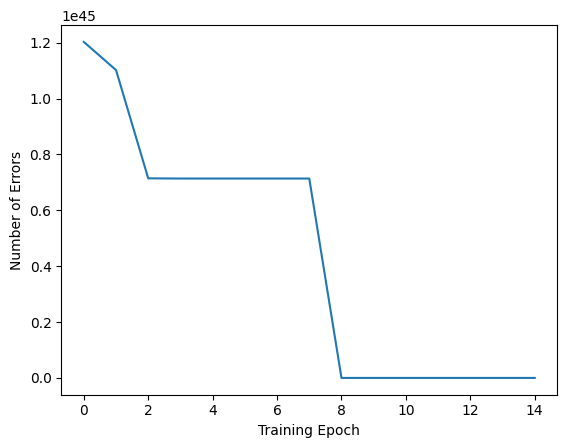

In [17]:
# data = iris.to_numpy()
# data = np.insert(data, 4, np.ones(np.size(data, 0)), axis=1)

# initial_weights = np.random.rand(np.size(data, 1) - 1)
# np.random.shuffle(data)

error, weights = variablePerceptron(data, initial_weights, 0.01, "setosa", epochs=15)

# weights = np.random.rand(np.size(data,1)-1)

# error,weights = variablePerceptron(train,weights,0,"A")

plt.figure()
plt.plot(error)
plt.xlabel("Training Epoch")
plt.ylabel("Number of Errors")

In [18]:
np.random.shuffle(data)
test = data

classif = np.empty(np.size(test,0))
for i in range(np.size(test,0)):
    classif[i] = int(np.sign(np.dot(weights.T, data[i,0:5])))

out = np.append(data,classif[:,None],1)

A = out[out[:,6]==1]
B = out[out[:,6]==-1]

/var/folders/h2/zh2mqz7x6yv7qwpkz0q_vlk00000gn/T/ipykernel_67811/632731595.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=2)


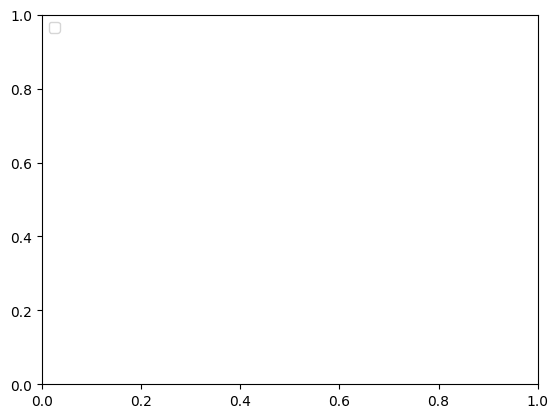

In [19]:
xx,yy = np.meshgrid(range(1,9),range(1,9))
zz = (-weights[0]*xx - weights[1]*yy - weights[4])*1.0 / weights[2]

fig = plt.figure()
ax = Axes3D(fig)
for ii in [A,B]:
    lbl = np.unique(ii[:,6])
    if lbl == 1:
        lbl = "Iris setosa"
    elif lbl == -1:
        lbl = "Iris versicolor/virginica"
    ax.scatter(xs=np.asarray(ii[:,0],dtype="float"),ys=np.asarray(ii[:,1],dtype="float"),zs=np.asarray(ii[:,2],dtype="float"),label=lbl)
        
ax.plot_surface(xx,yy,zz,alpha=0.2)
plt.legend(loc=2)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
plt.show()